# IMAGE CLASSIFICATION (CIFAR-10) USING CNNs - APPLICATION

CIFAR-10 is a dataset that consists of several images divided into the following 10 classes:

  0: Airplanes
  1: Cars
  2: Birds
  3: Cats
  4: Deer
  5: Dogs
  6: Frogs
  7: Horses
  8: Ships
  9: Trucks
The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
CIFAR-10 is widely used for machine learning and computer vision applications.
The dataset consists of 50,000 32x32 color  training images, labeled over 10 categories, and 10,000 test images.

In [1]:
## Import libraries and Dataset
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, MaxPool2D, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from sklearn.metrics import classification_report
import random
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

Using TensorFlow backend.
C:\Users\nitishg\AppData\Roaming\Python\Python37\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [3]:
# Preprocessing
num_classes = 10

y_cat_test = to_categorical(y_test,num_classes)
y_cat_train = to_categorical(y_train,num_classes)
print('y_categorical_train shape:', y_cat_train.shape)
print('y_categorical_test shape:', y_cat_test.shape)

# determining the value to be normalised 
x_train = x_train/255
x_test = x_test/255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

y_categorical_train shape: (50000, 10)
y_categorical_test shape: (10000, 10)
x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


In [4]:
# Building the model 
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=128, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(1024, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Model Summary
model.summary()

# Run the model using the number of epochs
##model.fit(x_train,y_cat_train,verbose=1,epochs=10)
history = model.fit(x_train, y_cat_train, batch_size = 32, verbose=1, epochs=22, shuffle = True)

model.evaluate(x_test,y_cat_test)

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 29, 29, 128)       6272      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        131136    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1639424   
________________________________________________

[1.9505618636608124, 0.6672000288963318]

              precision    recall  f1-score   support

     Class 0       0.73      0.67      0.70      1000
     Class 1       0.90      0.75      0.82      1000
     Class 2       0.44      0.69      0.54      1000
     Class 3       0.59      0.34      0.44      1000
     Class 4       0.53      0.72      0.61      1000
     Class 5       0.60      0.58      0.59      1000
     Class 6       0.74      0.77      0.76      1000
     Class 7       0.91      0.57      0.70      1000
     Class 8       0.78      0.78      0.78      1000
     Class 9       0.73      0.80      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.70      0.67      0.67     10000
weighted avg       0.70      0.67      0.67     10000



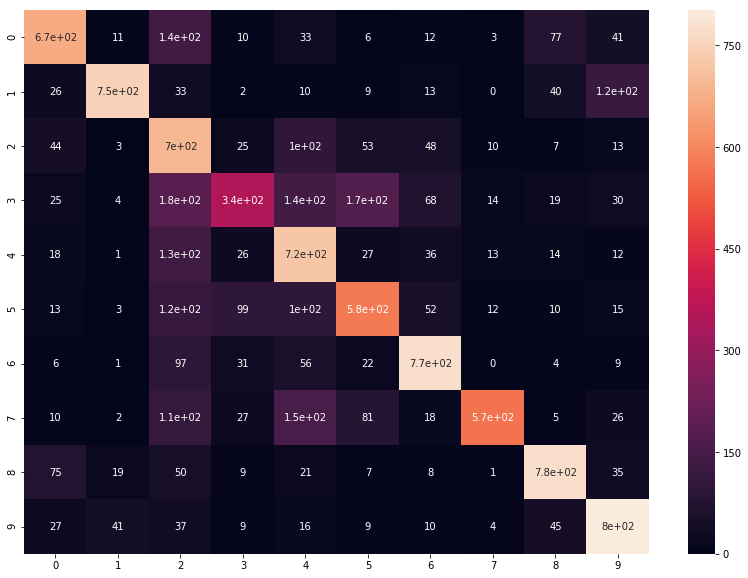

In [5]:
predictions = model.predict_classes(x_test)
# Confusion Matrix (Sum the diagonal element to get the total true correct values)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

# classifiation report
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predictions, target_names = target_names))
# model.save('APP_CIFAR10_model.h5')

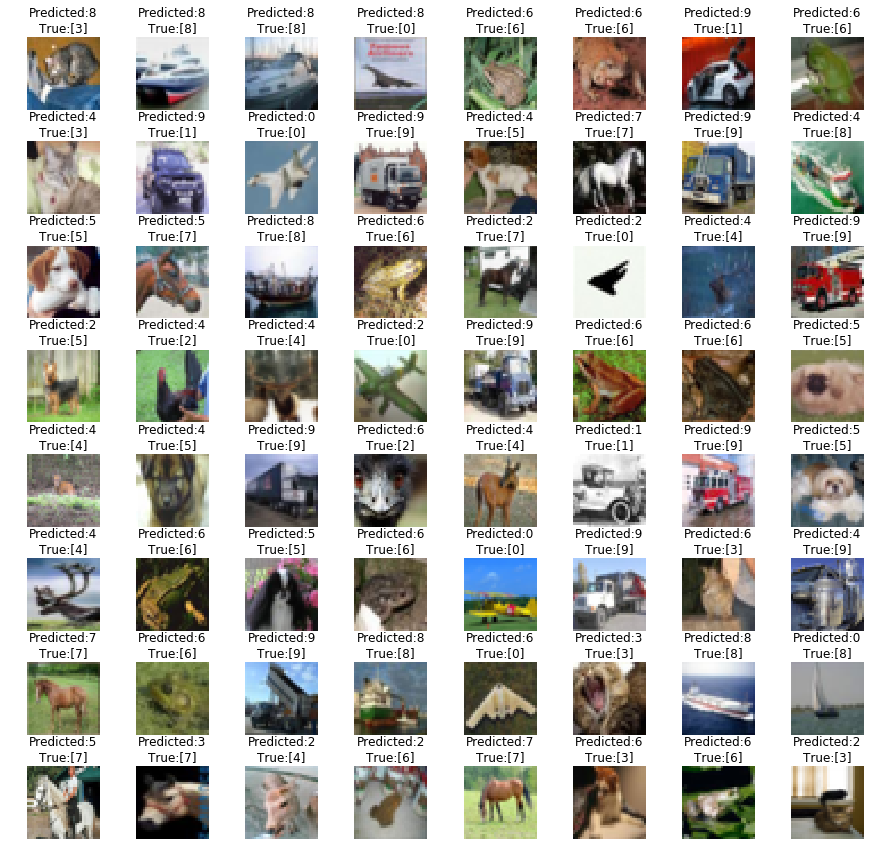

In [6]:
# Plot the predict vs true class for visulaizing purposes
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (15,15))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i].reshape(32,32,3))
    axes[i].set_title("Predicted:" + str(predictions[i]) + "\n" + "True:" + str(y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)